**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! The project is accepted. Good luck on the next sprint!

# Taxi Companies in Chicago

As an analyst at Zuber, a new ride-sharing company locating in Chicago. The job is to analyze data on taxi rides in Chicago. 

##  Introduction
Presented is an analysis of taxi ride data based on neighborhoods, trips, durations, and weather records. 

###  Goal:
This report will focus on analyzing different factors and hope to identify patterns in passenger preferences for taxi service and whether external factors have impact on rides. This will allow us to adjust service and plan advertising campaigns accordingly.


### Stages:
This project will consist of the following stages:

1. Introduction
2. Data Initialization
3. Exploratory Data Analysis
    1. Data preprocessing
    2. Top 10 drop-off neighborhoods
        1. Graphical representation
    3. Top companies based on number of trips
        1. Graphical representation
4. Test Statistical Hypothesis 
    1. The average duration of rides from the Loop to O'hare International Airport does not change on rainy Saturdays.
5. Conclusion
         

## Data Initialization

In [1]:
# SQL steps

import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = 'https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id":"weather_records"})
heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)
content = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)


           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


In [ ]:
SELECT
    trips.start_ts AS start_ts,
    CASE WHEN weather_records.description LIKE '%rain%' OR weather_records.description LIKE '%storm%' THEN 'Bad'
    ELSE 'Good'
    END AS weather_condtions,
    CAST(trips.duration_seconds AS real) AS duration_seconds
FROM
    trips
    INNER JOIN weather_records ON weather_records.ts = trips.start_ts
WHERE
    trips.pickup_location_id = '50' 
    AND trips.dropoff_location_id = '63'
    AND EXTRACT(DOW from trips.start_ts) = 6
ORDER BY
    trips.trip_id

### Library and Dataset import

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import functools as ft
import seaborn as sns

In [3]:
#import the first dataset, name as company
company = pd.read_csv('/datasets/project_sql_result_01.csv')

#checking the info in the dataset
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# general information about this dataset

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


We can see that this dataset contains the following information:
- `company_name`: taxi company name
- `trips_amount`: the number of rides for each taxi company on November 15-16, 2017.

We observed that there are no missing values, and the datatype appeared to be correct. Let's move on to the next dataset.

In [5]:
# read the second dataset

dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

#checking the info of the dataset

dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
#general information

dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The dataset contains the following:
- `dropoff_location_name`: Chicago neighborhoods where rides ended
- `average_trips`: the average number of rides that ended in each neighborhood in November 2017.

We see that 'average_trips' contains float type, we can change it to integer and round the number up if needed.

In [7]:
#import the last dataset

rides = pd.read_csv('/datasets/project_sql_result_07.csv')

rides.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [8]:
#general information

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


The dataset contains the following:

- `start_ts` — pickup date and time
- `weather_conditions` — weather conditions at the moment the ride started
- `duration_seconds` — ride duration in seconds

No missing values, we need to convert the 'start_ts' to date-time format.

## Exploratory Data Analysis

### Change datatype + round up values


In [13]:
# for dropoff dataset

dropoff['average_trips'] = np.ceil(dropoff['average_trips'])

dropoff['average_trips'] = dropoff['average_trips'].astype('int')

dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


In [42]:
#for rides

rides['duration_seconds'] = rides['duration_seconds'].astype('int')

rides['start_ts'] = pd.to_datetime(rides['start_ts'], format = '%Y-%m-%d %H:%M:%S')

rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


### Top 10 drop-off neighborhoods

We will determine the top 10 drop-off neighborhoods by sorting the dropoff dataset by descending order of the average_trips column.

In [15]:
#sort the dataset by descending order of 'average trips'
top = dropoff.sort_values(by='average_trips', ascending = False)
top_10 = top.head(10)

top_10

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


We will plot this by creating a bar plot.

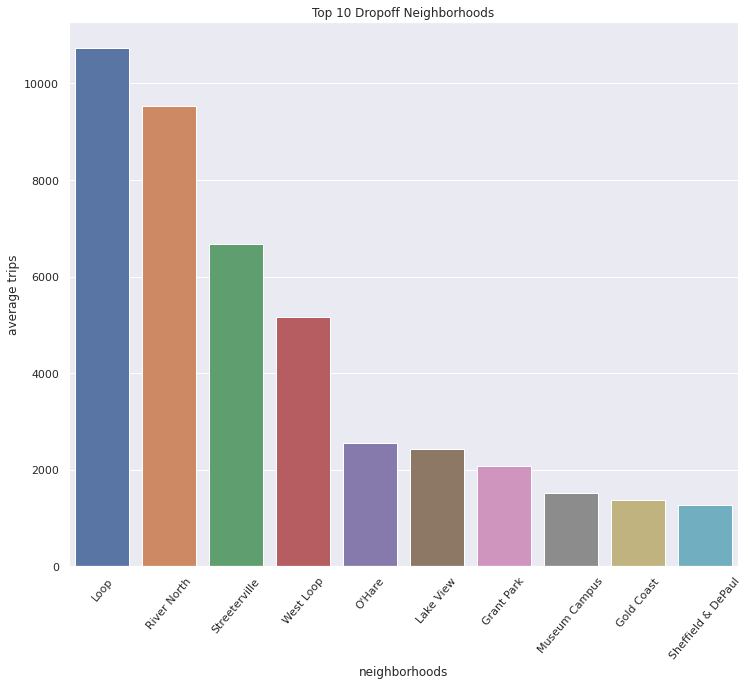

In [24]:
#bar plot

ax = sns.barplot(x='dropoff_location_name', y='average_trips', data = top_10)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
sns.set(rc={'figure.figsize':(12,10)})
ax.set(xlabel='neighborhoods', ylabel='average trips', title = 'Top 10 Dropoff Neighborhoods')
plt.show()

We can see that the most popular dropoff neighborhood is the Loop, followed by River North, Streeterville, and West Loop. O'hare, Lake view and Grant Park appeared to be similar in terms of average trips. While Museum campus, Gold Coast and Sheffield & Depaul are similar in average trips. There is a large difference between the top 4 neighborhood and the rest. 

### Top taxi companies by number of trips

Since we have 64 companies, let's select the top 20 by sorting them by trips_amount.

In [30]:
#Top 20 companies based on trips_amount

company_top = company.sort_values(by='trips_amount', ascending = False)
company_top_20 = company_top.head(20)
company_top_20

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Let's plot this by using a bar plot.

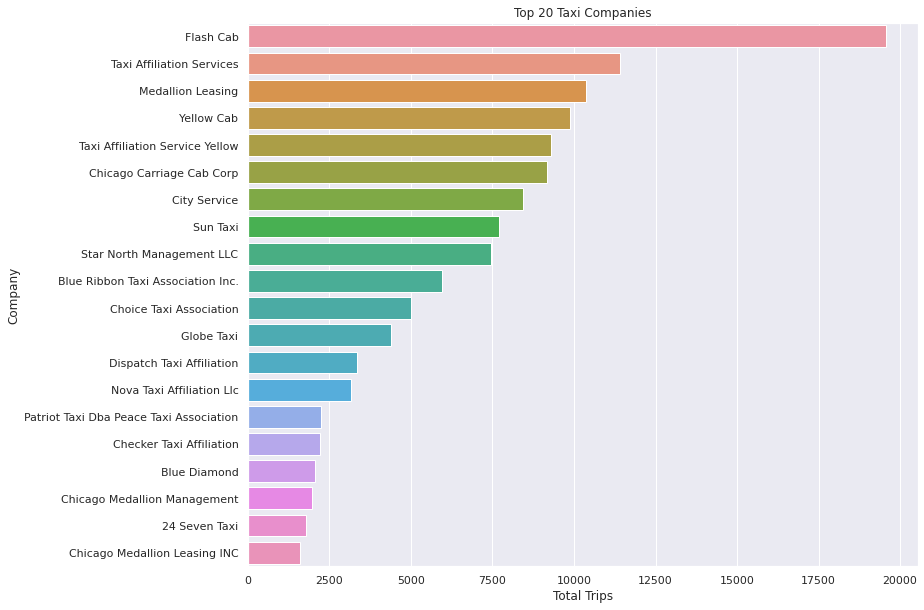

In [33]:
#bar plot

ax1 = sns.barplot(x='trips_amount', y='company_name', data = company_top_20)
sns.set(rc={'figure.figsize':(12,10)})
ax1.set(xlabel='Total Trips', ylabel='Company', title = 'Top 20 Taxi Companies')
plt.show()

We can see that a lot more customers chose Flash Cab. Follow by Taxi Affliation Services to Star North Management LLC, the amount of customers choosing these companies are similar. While less people chose Blue Ribbon to Chicago medallion leasing INC of the top 20.

## Hypothesis Testing


- `The null hypothesis`: the average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
- `The alternative hypothesis`: the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In order to test this hypothesis, we need to make two slices from our third dateset 'rides', one with weather_conditions = good, the other one with 'bad'.

In [38]:
#good weather

good_weather = rides.query('weather_conditions == "Good"')

good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.8+ KB


In [39]:
#bad weather

bad_weather = rides.query('weather_conditions == "Bad"')

bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.6+ KB


Before the hypothesis testing, lets use Levene's test to determine whether these two slices have equal variance.

In [40]:
#Levene's test
#set alpha
alpha = 0.05 

result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are most likely the same')
else:
    print('The variances are most likely not the same')

p-value: 0.3968505113995001
The variances are most likely the same


In [43]:
#Hypothesis testing
#set alpha

alpha = 0.05

#test
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var =True)

print('p-value:', results.pvalue)

#hypothesis testing

if results.pvalue > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 6.517970327099473e-12
We reject the null hypothesis


Based on our statstical analysis, we will reject he null hypothesis, thus accepting the alternative hypothesis: **the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**

## Conclusion

We have found the top 10 dropoff neighborhoods, with the Loops being the most popular neighborhood by far. We have also found that Flash Cab to be the most used taxi company. And by 95% confidence, we can conclude that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.